In [4]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1250",
    database="olist"
)

In [ ]:
plt.style.use("seaborn-v0_8-pastel")

### Q2. 상품 카테고리별 판매 상위 10개 상품

SQL문

In [33]:
q2_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
        COUNT(order_items.product_id) AS count_sales
    FROM
    	order_items
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	count_sales DESC
    LIMIT 10;
"""

데이터 분석

In [34]:
q2_df = pd.read_sql(q2_sql, conn)
q2_df = q2_df.sort_values(by="count_sales", ascending=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_106600\1005635686.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2_df = pd.read_sql(q2_sql, conn)


In [35]:
q2_df

,category_name,count_sales
9,auto,4235
8,garden_tools,4347
7,telephony,4545
6,watches_gifts,5991
5,housewares,6964
4,computers_accessories,7827
3,furniture_decor,8334
2,sports_leisure,8641
1,health_beauty,9670
0,bed_bath_table,11115


데이터 시각화

Text(0, 0.5, 'Category Name')

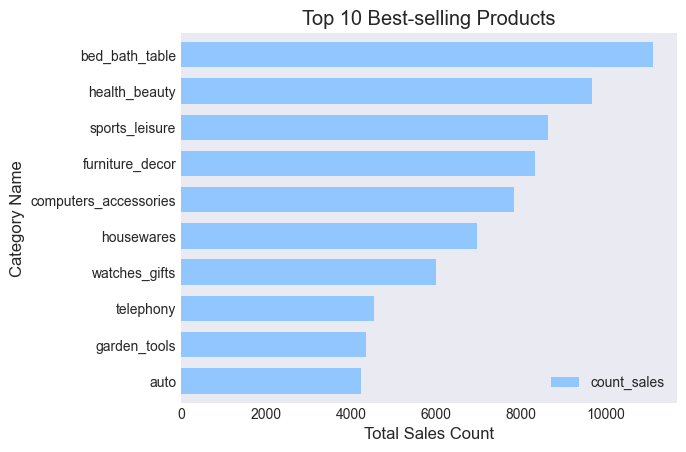

In [36]:
q2_df.plot(kind="barh", x="category_name", width=0.7)
plt.title("Top 10 Best-selling Products")
plt.xlabel("Total Sales Count")
plt.ylabel("Category Name")